**Predicting people who are more likely paid back their loanfrom LendingClub.com**

Based on LendingClub data set from 2007-2010, using Decision Tree Method and Random Forest to classify people who are more likely to pay back their loans.

**Import Module**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Reading the data set**

as for this project, the data set contains people profile in **LendingClub.com**, such as :

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [4]:
df = pd.read_csv('loan_data.csv')

Checking the data

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


**Data Exploration**

In [12]:
# Checking columns names
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

<AxesSubplot:xlabel='fico', ylabel='Count'>

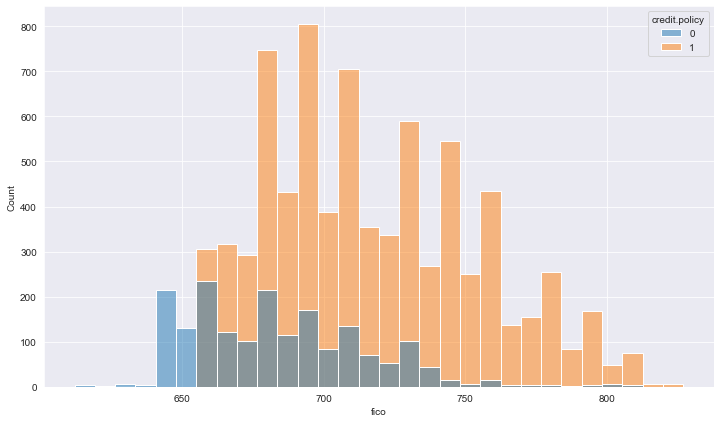

In [18]:
plt.figure(figsize=(12,7))
sns.set_style('darkgrid')

sns.histplot(x='fico', data=df, hue='credit.policy', bins=30)

From the histplot above, we could note that most of the customers meets the credit underwriting criteria of LendingClub.com

Lets check whether or not they paid back their loans.

<AxesSubplot:xlabel='fico', ylabel='Count'>

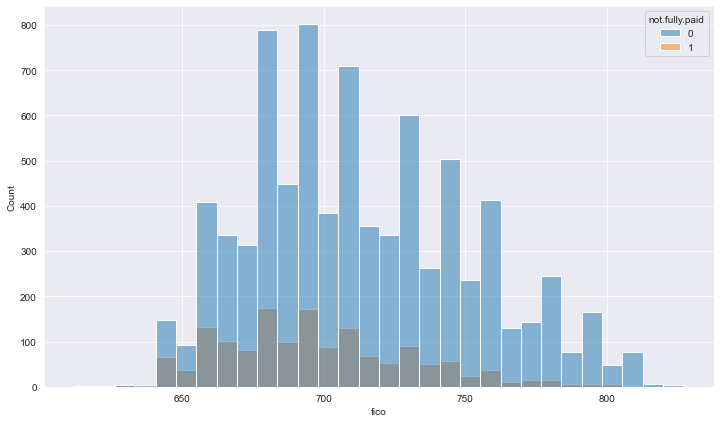

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(x='fico',data=loans, hue='not.fully.paid', bins=30)

most of the costumers fully paid their loan based on their fico scores. the histplot above had show the same pattern with the 'credit policy' histplot which also conclude that a customers that fulfil the credit policy could paid back their loans. although there are still another factor or features we could analyze.

<AxesSubplot:xlabel='purpose', ylabel='count'>

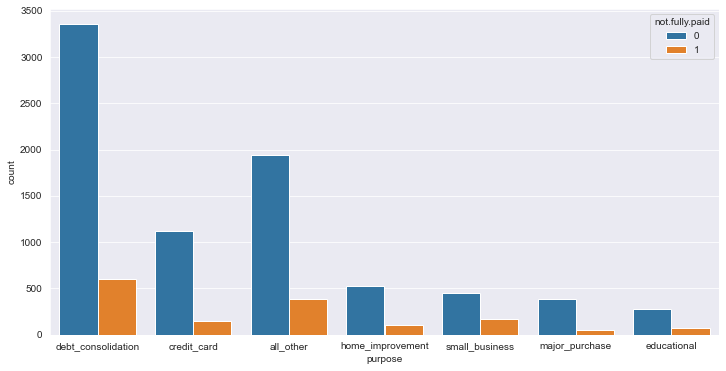

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=loans, hue='not.fully.paid')

from the countplot shown above, most of the customers borrow money for debt consolidation problems.

# **Data Cleaning**(Simple)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


From the dataframe information above, we could notice that **purpose** column are still in categorical object value. to train our model, we need to change it into numerical type so sklearn will be able to understand them.

In [23]:
final_df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

the code above will split the purpose column into multi column that specify their characteristic with 0 and 1 value.

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Notice from the information above, we could see purpose columns has split into some column with integer dtype. this way, sklearn now will be able to understand them.

# Train Model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = final_df.drop('not.fully.paid', axis=1) #predictors 
y = final_df['not.fully.paid'] #target

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Method

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dtree_model = DecisionTreeClassifier()

In [32]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Predict X_test
predictions = dtree_model.predict(X_test)

In [36]:
#Evaluating our model
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [37]:
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

In [38]:
print(f"Precision : {precision} \nRecall : {recall} \nF1-Score : {f1}")

Precision : 0.2 
Recall : 0.21244635193133046 
F1-Score : 0.20603537981269512


In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.21       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



Based on the evaluation, our model still can't predict accurately for the '1' value from the target value. Lets try using **Random Forest**.

# Random Forest Classification

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rfc_model = RandomForestClassifier(n_estimators=200) #n_estimators is the number of trees you want to build before taking the maximum voting or averages of predictions.

In [42]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
# Predict X test
rfc_predictions = rfc_model.predict(X_test)

In [44]:
#model evaluation
rfc_precision = precision_score(y_test, rfc_predictions)
rfc_recall = recall_score(y_test, rfc_predictions)
rfc_f1 = f1_score(y_test, rfc_predictions)


In [45]:
print(f"Precision : {rfc_precision} \nRecall : {rfc_recall} \nF1-Score : {rfc_f1}")

Precision : 0.4166666666666667 
Recall : 0.02145922746781116 
F1-Score : 0.04081632653061225


In [46]:
print(classification_report(y_test, rfc_predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.42      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



From our Evaluation, we could see both of our model using decision tree and random forest did not perform very well. at this point, we need more feature engineering. 